In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
import string
#nltk.download('stopwords')
#nltk.download("punkt")

In [2]:
df = pd.read_csv("dataset.csv")
df.head(5)

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,predicted_category,sentiment
0,326d4bdd-8fc6-4d64-b3bf-ce393fb2ae9b,woww,5,0,NaN,2022-08-16 05:55:38,NaN,NaN,USER_EXPERIENCE,NEUTRAL
1,4bbf741b-2f69-43cd-bb76-f9b5f84c83b5,let me know more details about this,3,0,4.5.1143533,2022-08-16 04:44:45,NaN,NaN,CONTENT,NEUTRAL
2,3cb1136d-e7c6-4999-aa84-fdc7bcdccf56,i've been using this for a while and there's a...,2,0,4.5.1143533,2022-08-16 04:05:27,NaN,NaN,INTERFACE,NEGATIVE
3,d6f80f05-a6e8-44f3-a380-7c59ed3d208b,good,2,0,4.5.1143533,2022-08-16 00:22:33,NaN,NaN,USER_EXPERIENCE,POSITIVE
4,eecb277c-c658-4b2d-86c9-77d3a7022cac,mjkobe,5,0,4.5.1143533,2022-08-15 20:08:25,NaN,NaN,USER_EXPERIENCE,NEUTRAL


In [3]:
df.describe()

,score,thumbsUpCount
count,43366.000000,43366.000000
mean,4.374026,2.007748
std,1.205079,12.353477
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,1.000000
max,5.000000,561.000000


In [4]:
print("Number of NaNs for each column")
df.isnull().sum()

Number of NaNs for each column


reviewId                    0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion     4907
at                          0
replyContent            40889
repliedAt               40889
predicted_category          0
sentiment                   0
dtype: int64

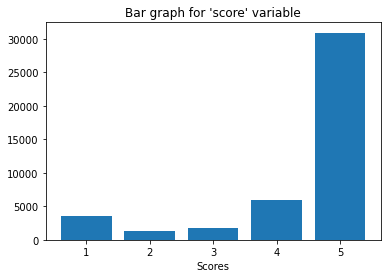

In [5]:
plt.bar(df["score"].value_counts().keys(), df["score"].value_counts().values)
plt.title("Bar graph for 'score' variable")
plt.xlabel("Scores")
plt.show()

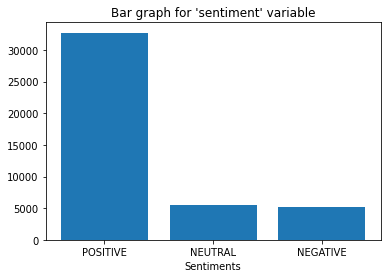

In [6]:
plt.bar(df["sentiment"].value_counts().keys(), df["sentiment"].value_counts().values)
plt.title("Bar graph for 'sentiment' variable")
plt.xlabel("Sentiments")
plt.show()

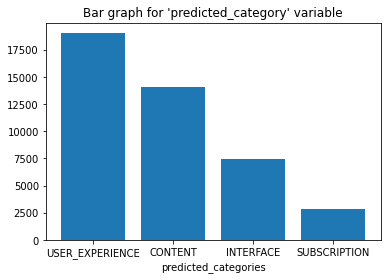

In [7]:
plt.bar(df["predicted_category"].value_counts().keys(), df["predicted_category"].value_counts().values)
plt.title("Bar graph for 'predicted_category' variable")
plt.xlabel("predicted_categories")
plt.show()

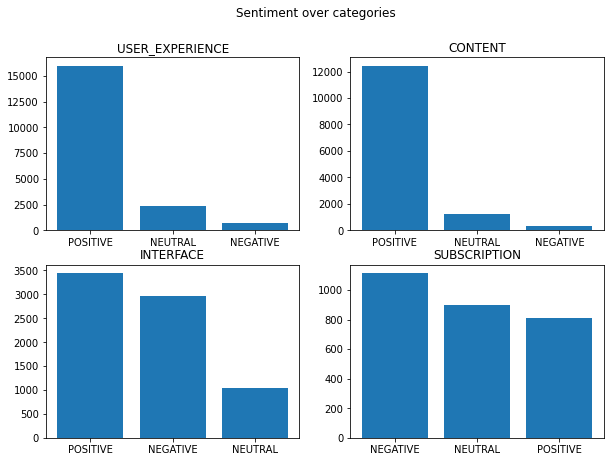

In [55]:
figure, axis = plt.subplots(nrows=2, ncols=2, figsize = (10, 7))
figure.suptitle("Sentiment over categories")
filtered_df = df[df["predicted_category"] == "USER_EXPERIENCE"]["sentiment"]
axis[0,0].bar(height = filtered_df.value_counts().values, x = filtered_df.value_counts().keys())
axis[0,0].set_title("USER_EXPERIENCE")
filtered_df = df[df["predicted_category"] == "CONTENT"]["sentiment"]
axis[0,1].bar(height = filtered_df.value_counts().values, x = filtered_df.value_counts().keys())
axis[0,1].set_title("CONTENT")
filtered_df = df[df["predicted_category"] == "INTERFACE"]["sentiment"]
axis[1,0].bar(height = filtered_df.value_counts().values, x = filtered_df.value_counts().keys())
axis[1,0].set_title("INTERFACE")
filtered_df = df[df["predicted_category"] == "SUBSCRIPTION"]["sentiment"]
axis[1,1].bar(height = filtered_df.value_counts().values, x = filtered_df.value_counts().keys())
axis[1,1].set_title("SUBSCRIPTION")
plt.show()

In [9]:
sWords = stopwords.words("english")#lista di stopwords per l'inglese
text = ""

for review in df["content"]:
    text += " "+review

text[:100]

" woww let me know more details about this i've been using this for a while and there's a basic bug t"

In [10]:
text_new = "".join([w for w in text if w not in string.punctuation]) #rimuove punteggiatura
words = nltk.tokenize.word_tokenize(text_new) #tokenizza
words_cleaned = [w for w in words if w not in sWords] #rimuove le stopwords
words_cleaned[:10]

['woww',
 'let',
 'know',
 'details',
 'ive',
 'using',
 'theres',
 'basic',
 'bug',
 'still']

In [11]:
freq_dist_words = nltk.FreqDist(words_cleaned) #calcola la distribuzione di frequenza delle parole
freq_dist_words

FreqDist({'app': 14169, 'great': 7622, 'good': 6337, 'articles': 6164, 'medium': 4839, 'love': 4680, 'read': 4456, 'reading': 3441, 'content': 3415, 'nice': 2453, ...})

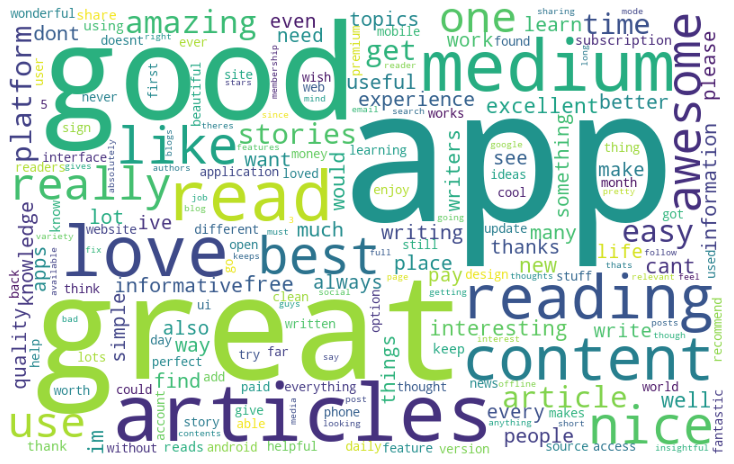

In [12]:
wCloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(freq_dist_words) #genera la wordcloud direttamente dalle frequenze calcolate con nltk

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wCloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

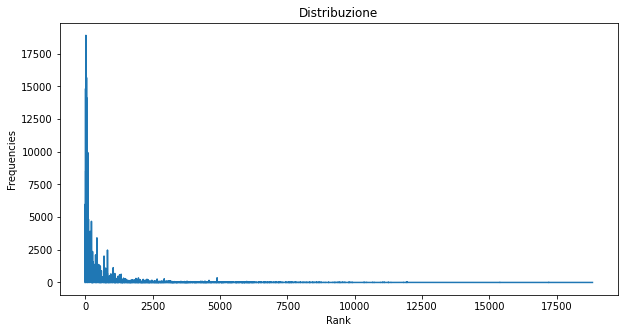

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(nltk.FreqDist(words).values()) #qui sono ancora incluse le stopwords
plt.title("Distribuzione")
plt.xlabel("Rank")
plt.ylabel("Frequencies")
plt.show()
#Segue Zipf

In [57]:
#average rating score for sentiment

for sentiment in df["sentiment"].unique():
    average = df[df["sentiment"] == sentiment]["score"].mean()
    print(f"Average score for {sentiment} is {average}.\n")

Average score for NEUTRAL is 4.070280036133695.

Average score for NEGATIVE is 2.138524750538055.

Average score for POSITIVE is 4.774602689486553.

